<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [67]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)))


0.4399338661568968 55.627840795469155


In [68]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.105)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)
print(r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)))


0.4522084743503163 55.01488399266955


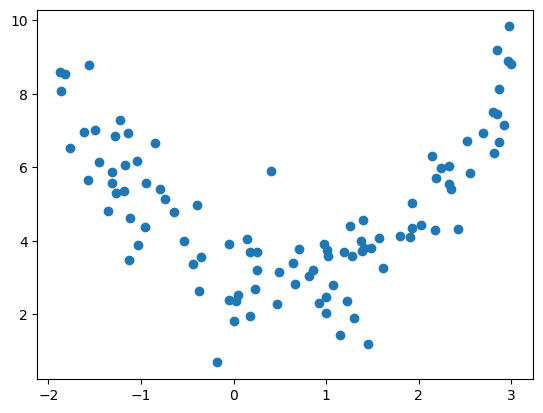

In [69]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.9 * x ** 2 - 1 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()

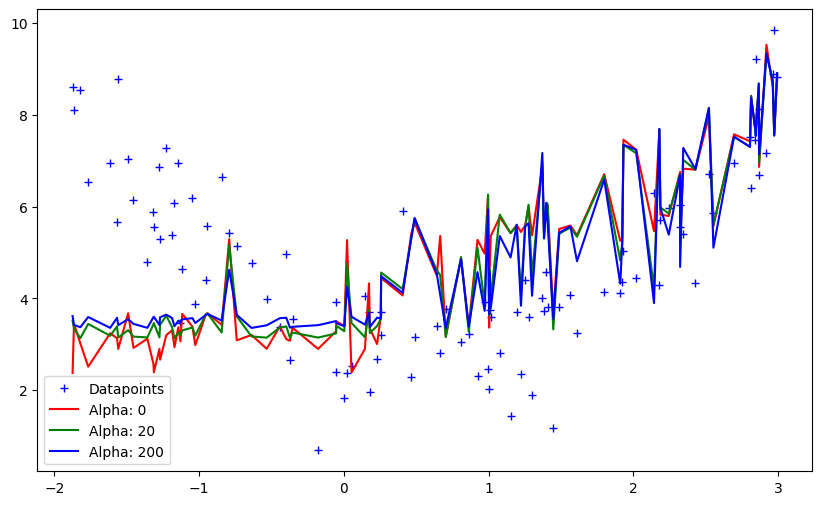

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x, y, alpha)
    plt.plot(sorted(x[:, 0]), preds[np.argsort(y[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()